<a href="https://colab.research.google.com/github/coader-128/Tensorflow/blob/Neural_network_Classification/Neural_Network_Classification_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [ ]:
# introduction to neural network classification with tensorflow



# creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples

n_samples = 1000

# create circles

x , y = make_circles(n_samples ,
                     noise=0.09 ,
                     random_state = 43,
                     factor=0.5) # factor represent how close th two circles are closer to 0 is more separete and vise versa


In [ ]:
# check out heatures
x

array([[ 0.02910325, -0.50093231],
       [ 0.4464375 , -0.14221367],
       [-0.6393452 ,  0.81246111],
       ...,
       [-0.96809291, -0.15075549],
       [-0.60186834, -0.70097173],
       [-0.11133074, -0.40840275]])

In [ ]:
x[ : , 0 ] # 1st element of each inner list

array([ 0.02910325,  0.4464375 , -0.6393452 ,  0.48262732, -0.26174559,
       -0.30976209,  0.08191951, -0.11755608,  0.72745708,  0.08911762,
        0.56889289, -0.68524752, -0.53574482, -0.4874238 , -0.06054204,
       -0.34107088, -0.7381649 ,  0.347231  ,  0.66836195,  0.33458076,
       -0.05234665,  0.27275394, -0.24182873,  0.61608015, -0.92494744,
       -0.72533017,  0.41777042,  0.97003584, -0.91416794, -0.82528306,
        0.48319444, -0.93169757, -0.13221307, -0.05114222,  0.22104493,
        0.10871291,  0.49217965,  0.17398831,  0.25957849, -0.91279292,
       -0.75320851,  0.47692721,  0.19718305, -0.16315443, -0.69309555,
       -0.17755314,  1.07280611,  0.29122683, -0.6368337 ,  0.04252072,
        0.20236204,  0.61780717,  0.59978442, -0.33171141,  0.55057908,
        0.99156176,  0.58807233,  0.02299447,  0.03320638, -0.96545888,
        0.02138136,  0.29460457,  0.94488526,  0.45233359,  0.16214346,
       -0.00808232,  0.50103296, -0.25412039,  0.39548354,  0.96

In [ ]:
#check yje labels
y[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
# our data is little hard to understand right now
circles = pd.DataFrame({"x0":x[: , 0 ] , "x1" : x[: , 1] ,"label": y})
circles

,x0,x1,label
0,0.029103,-0.500932,1
1,0.446437,-0.142214,1
2,-0.639345,0.812461,0
3,0.482627,0.107350,1
4,-0.261746,0.168820,1
...,...,...,...
995,-0.806003,-0.366831,0
996,-0.273672,-0.350962,1
997,-0.968093,-0.150755,0
998,-0.601868,-0.700972,0


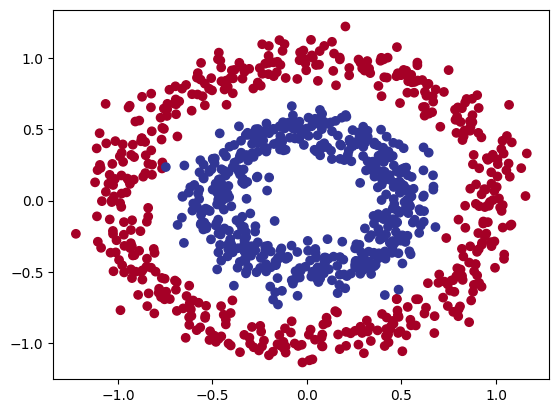

In [ ]:
#visulalise with a plot

plt.scatter(x[: , 0] , x[: , 1] , c = y , cmap = plt.cm.RdYlBu)

In [ ]:
#input and putput shapes

x.shape  , y.shape

((1000, 2), (1000,))

In [ ]:
# view the first example of data

x[0] , y[0]

(array([ 0.02910325, -0.50093231]), 1)

In [ ]:
# making model

tf.random.set_seed(43)

model = tf.keras.Sequential([
    #tf.keras.layers.Input(1000,2),
    tf.keras.layers.Dense(1)
])

model.compile( loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

model.fit(x , y , epochs = 5)



Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.0763 - accuracy: 0.3980
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.5981 - accuracy: 0.5690
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9459 - accuracy: 0.6280
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6827 - accuracy: 0.6050
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 6.4081 - accuracy: 0.5040


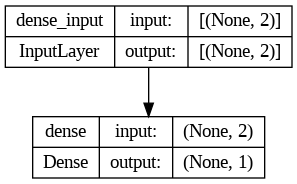

In [ ]:
tf.keras.utils.plot_model(model , show_shapes = True)

In [ ]:
# lets improve

model.fit(x , y , epochs = 200 , verbose = 0)
model.evaluate(x, y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6936154365539551, 0.5]

In [ ]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
tf.random.set_seed(43)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_2.fit(x , y , epochs = 200 , verbose = 0)

model_2.evaluate(x , y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936866641044617, 0.5]

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
# improve the model

tf.random.set_seed(43)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , input_shape = (2,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(x , y , epochs = 200 , verbose = 0)

model_3.evaluate(x , y)



32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4830


[0.693955659866333, 0.4830000102519989]

In [ ]:
model_3.predict(x)

32/32 [==============================] - 0s 2ms/step


array([[0.512735  ],
       [0.49511644],
       [0.47844145],
       [0.48635522],
       [0.4945593 ],
       [0.48551515],
       [0.4830875 ],
       [0.4813537 ],
       [0.5053701 ],
       [0.5122174 ],
       [0.46111935],
       [0.49104822],
       [0.50577325],
       [0.49343   ],
       [0.5137874 ],
       [0.47288013],
       [0.4841875 ],
       [0.48478293],
       [0.48480102],
       [0.48347068],
       [0.513746  ],
       [0.47696164],
       [0.4851223 ],
       [0.48102894],
       [0.5138299 ],
       [0.5294065 ],
       [0.5222943 ],
       [0.47329056],
       [0.49899212],
       [0.48621264],
       [0.49864942],
       [0.5192445 ],
       [0.51128227],
       [0.46895966],
       [0.4818839 ],
       [0.5040065 ],
       [0.46709472],
       [0.4613149 ],
       [0.5070806 ],
       [0.52177644],
       [0.5298441 ],
       [0.49224412],
       [0.48440352],
       [0.51341575],
       [0.5267929 ],
       [0.48229042],
       [0.4762228 ],
       [0.505

In [ ]:
# making plotting function

# create a ameshgridd of the different x values
# make prediction across the meshgrid
#plot the prediction as well as  a line between zones

def plot_decision_boundary(model , x , y):
  """plot decision boundary created by a model predicting on x"""
  x_min , x_max = x[: , 0].min()  - 0.1 , x[: , 0].max() + 0.1
  y_min , y_max = x[:, 1].min()  - 0.1 , x[:,1].max() + 0.1

  xx , yy = np.meshgrid(np.linspace(x_min , x_max,100),
                        np.linspace(y_min , y_max , 100))


# create x values

  x_in = np.c_[xx.ravel() , yy.ravel()]

  # make prediction
  y_pred = model.predict(x_in)

  #check for multi class

  if len(y_pred[0]) > 1:
    print("doing multu class")
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)

  else:

    print("doing bonary classification ")
    y_pred = np.round(y_pred).reshape(xx.shape)
    print(y_pred , "\n" , "the shape is ",y_pred.shape)
  # plot the decison boundary
    plt.contourf(xx, yy , y_pred , cmap = plt.cm.RdYlBu , alpha = 0.7)
    plt.scatter(x[ :, 0] , x[:,1] , c = y , s = 40 , cmap =plt.cm.RdYlBu  )
    plt.xlim(xx.min() , xx.max())
    plt.ylim(yy.min() , yy.max())





In [ ]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
y

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,

313/313 [==============================] - 1s 2ms/step
doing bonary classification 
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)


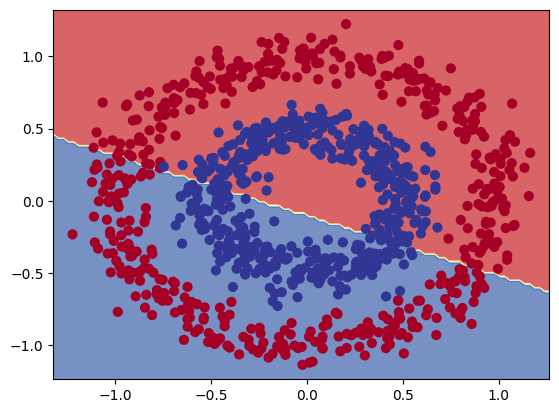

In [ ]:
# check out predictions of our model

plot_decision_boundary( model_3 , x , y)

In [ ]:
# lets see if we can use it for regresssion data

tf.random.set_seed(43)

X_regression = tf.range(0,1000,5)
Y_regression = tf.range(100,1100,5)

X_regression , Y_regression

# split our data

x_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]

y_reg_train = Y_regression[:150]
y_reg_test = Y_regression[150:]


x_reg_train.shape , y_reg_train.shape , x_reg_test.shape , y_reg_test.shape

(TensorShape([150]), TensorShape([150]), TensorShape([50]), TensorShape([50]))

In [ ]:
# improve the model

tf.random.set_seed(43)

model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , input_shape = (1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3_reg.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])


# fit our model

model_3_reg.fit(x_reg_train , y_reg_train , epochs = 100 , verbose =0)

model_3_reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#model eveluate

model_3_reg.evaluate(x_reg_test , y_reg_test)

2/2 [==============================] - 0s 8ms/step - loss: 67.0275 - mae: 67.0275


[67.02747344970703, 67.02747344970703]

2/2 [==============================] - 0s 6ms/step


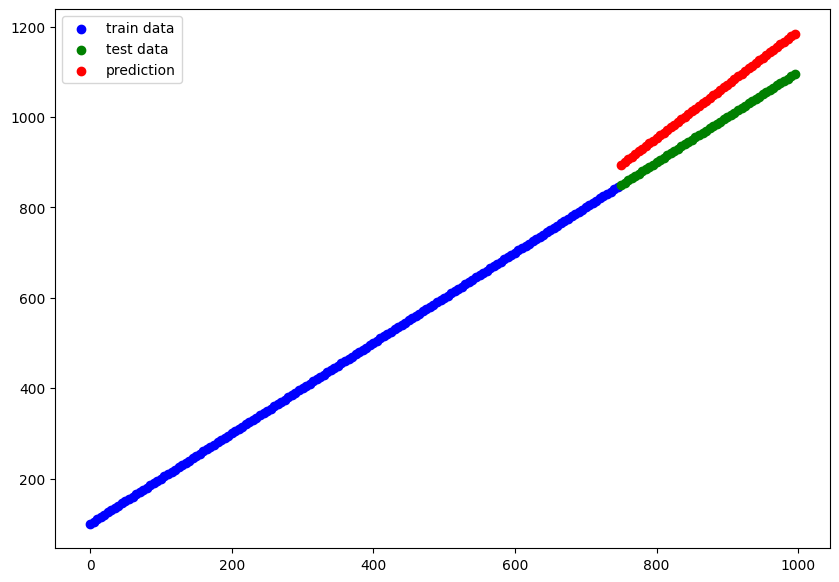

In [ ]:
# make prediction with our train model

y_reg_pred = model_3_reg.predict(x_reg_test)

plt.figure(figsize = (10,7))
plt.scatter(x_reg_train , y_reg_train , c = 'b' , label = "train data")
plt.scatter(x_reg_test , y_reg_test , c = 'g' , label = "test data")
plt.scatter(x_reg_test , y_reg_pred , c = 'r' , label = "prediction" )
plt.legend()

In [ ]:
## the missing piece is NON linearity

In [ ]:
tf.random.set_seed(43)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.linear),

])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = 'Adam',
                metrics = ['accuracy'])


history = model_4.fit(x,y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4403 - accuracy: 0.3670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3238 - accuracy: 0.3650
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1716 - accuracy: 0.3620
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0151 - accuracy: 0.3590
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8407 - accuracy: 0.3570
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6576 - accuracy: 0.3580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4596 - accuracy: 0.3570
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3074 - accuracy: 0.3550
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.0973 - accuracy: 0.3550
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8823 - accuracy: 0.3560
Epoch 11/

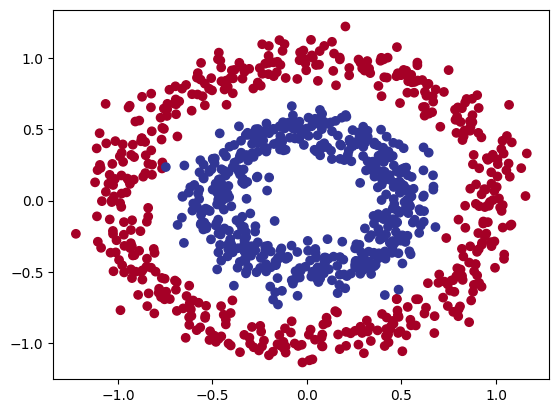

In [ ]:
# check our data

plt.scatter(x[: , 0] , x[ : ,1] , c = y , cmap = plt.cm.RdYlBu)


313/313 [==============================] - 1s 3ms/step
doing bonary classification 
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)


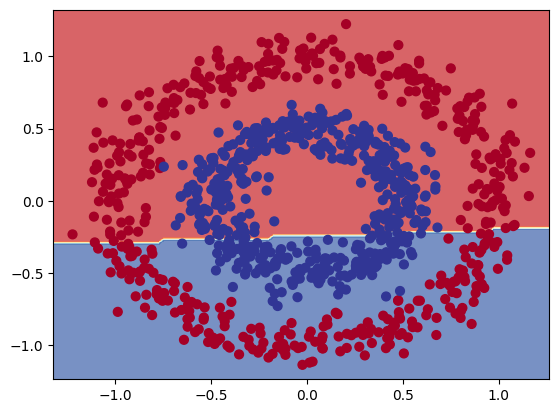

In [ ]:
# check our  prediction

plot_decision_boundary(model = model_4 , x = x , y = y)

## Building our model woth non linear activation function

In [ ]:
tf.random.set_seed(43)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , activation = 'relu')
])


model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

history = model_5.fit(x , y , epochs = 100 , verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 6.3002 - accuracy: 0.4310
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2741 - accuracy: 0.4360
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2622 - accuracy: 0.4340
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 6.2509 - accuracy: 0.4330
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 6.2497 - accuracy: 0.4330
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2487 - accuracy: 0.4330
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2476 - accuracy: 0.4330
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2469 - accuracy: 0.4330
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2454 - accuracy: 0.4330
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2448 - accuracy: 0.4350
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing bonary classification 
[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)


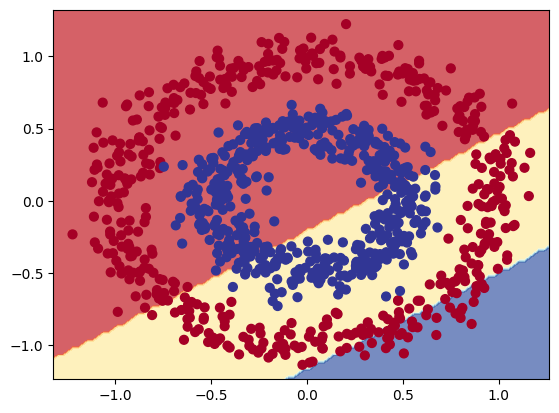

In [ ]:

plot_decision_boundary(model = model_5 , x = x , y = y)

313/313 [==============================] - 0s 1ms/step
doing bonary classification 
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] 
 the shape is  (100, 100)


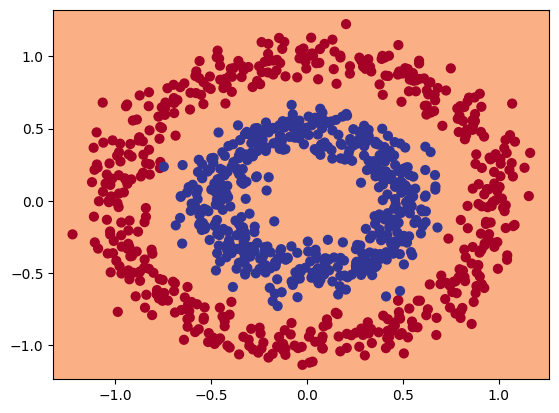

In [ ]:
tf.random.set_seed(43)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.softmax)
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

history = model_6.fit(x ,  y , epochs = 200 , verbose = 0)

plot_decision_boundary(model = model_6 , x = x , y = y)

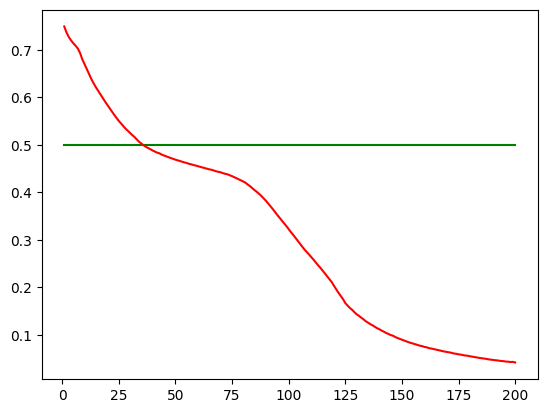

In [ ]:
history.history.keys()
epochs = np.arange(1 , len(history.history['accuracy'])+1 ,1)
plt.plot(epochs,history.history['accuracy']  , c = "g")
plt.plot(epochs,history.history['loss']  , c = "r")



313/313 [==============================] - 1s 2ms/step
doing bonary classification 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)


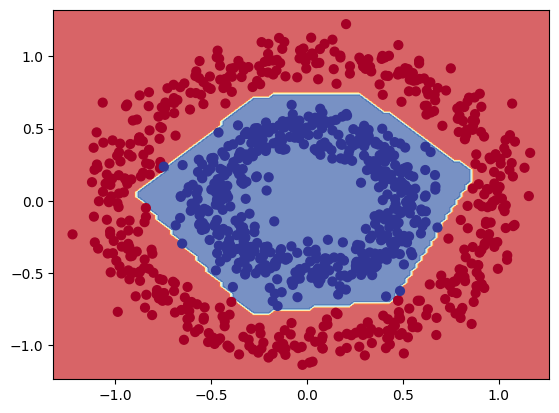

In [ ]:
# model 7 with output function as sigmoid

tf.random.set_seed(43)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')

])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics  = ['accuracy'])

history = model_7.fit(x , y ,epochs = 200 ,verbose = 0 )

plot_decision_boundary(model = model_7 , x = x , y = y)



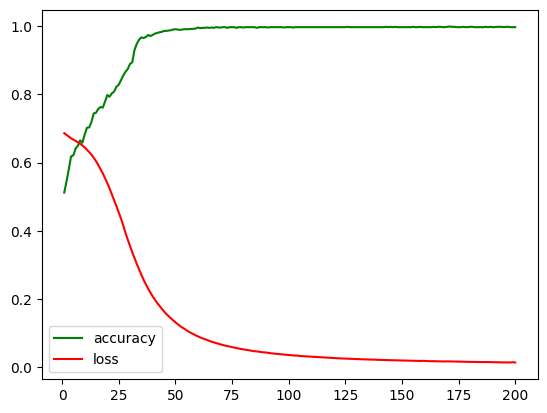

In [ ]:
epochs = np.arange(1 , len(history.history['accuracy'])+1 ,1)
plt.plot(epochs,history.history['accuracy']  , c = "g" , label = "accuracy")
plt.plot(epochs,history.history['loss']  , c = "r",label = "loss")
plt.legend()

In [ ]:
model_7.evaluate(x,y)


32/32 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 0.9970


[0.013236715458333492, 0.996999979019165]

In [ ]:
# Activation functions

A = tf.cast(tf.range(-10 , 10) , tf.float32)

A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

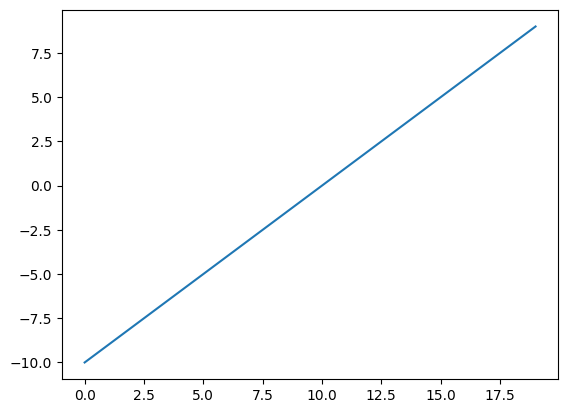

In [ ]:
plt.plot(A)


In [ ]:
def sigmoid(x):
  return 1 / (1+ tf.exp(-x))

# using sigmoid on A

sigmoid(A)



<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

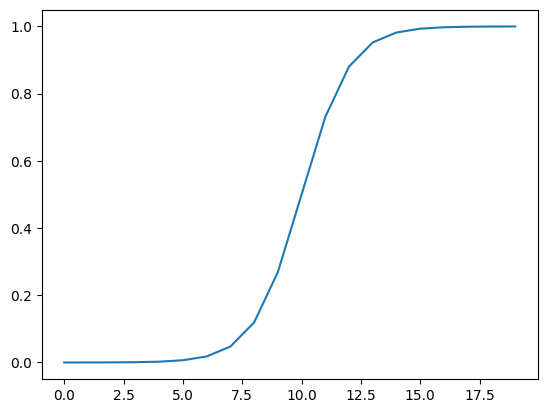

In [ ]:
#plotting our toy tensor

plt.plot(sigmoid(A))

In [ ]:
# replicating relu

def relu(x):
  return tf.maximum(0 , x)

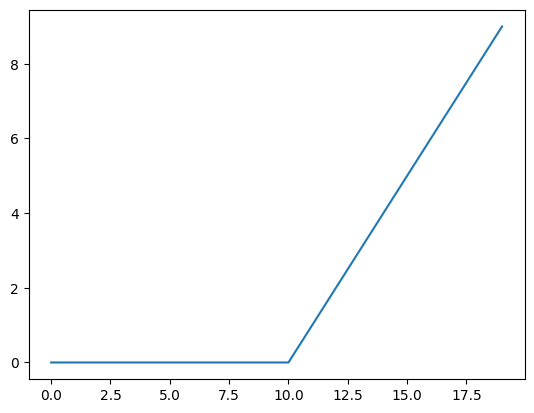

In [ ]:
plt.plot(relu(A))

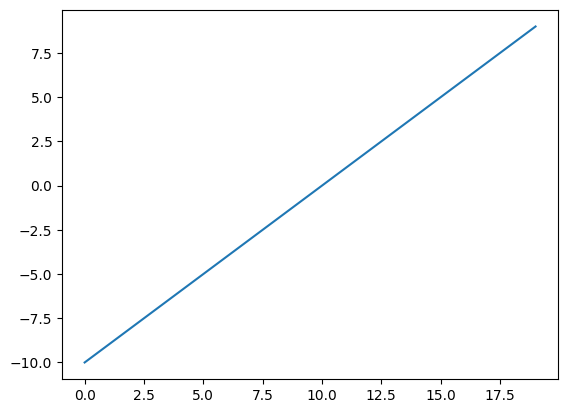

In [ ]:
# lets try linear activation function

def linear(x):# tf.keras.activations.linear(A)
  return x

plt.plot(linear(A))

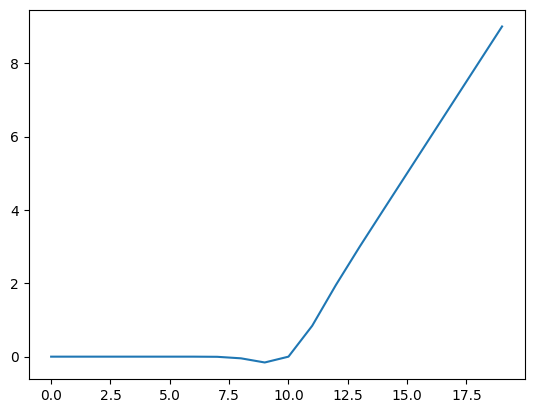

In [ ]:
plt.plot(tf.keras.activations.gelu(A))

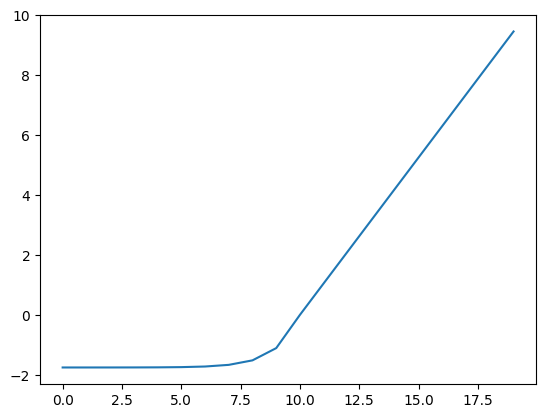

In [ ]:
plt.plot(tf.keras.activations.selu(A))

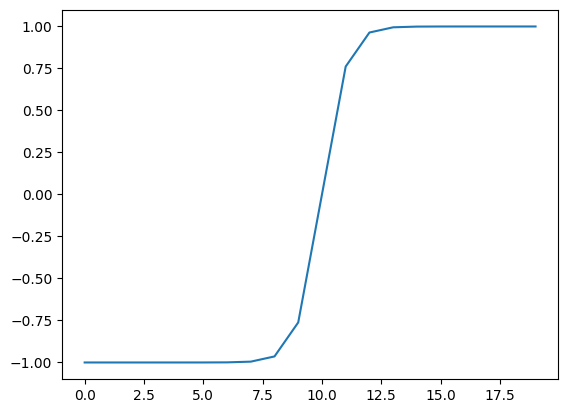

In [ ]:
plt.plot(tf.keras.activations.tanh(A))

In [ ]:
A.shape

TensorShape([20])

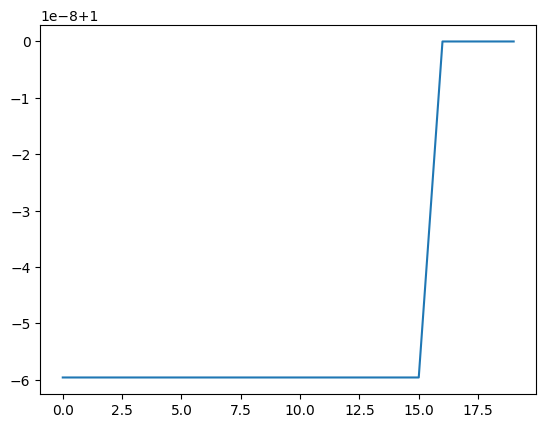

In [ ]:
plt.plot(tf.keras.activations.softmax(tf.reshape(A , shape = (20 , 1))))

# Increasing our accuracy and improving model

In [ ]:
# split into train and test

x_train , y_train = x[:800] , y[:800]
x_test , y_test = x[800:] , y[800:]

x_train.shape , x_test.shape



((800, 2), (200, 2))

In [ ]:
# lets recreate our model and fit on the training data

tf.random.set_seed(43)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation = "relu" ),
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])


model_8.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
                metrics = ['accuracy'])


history = model_8.fit(x_train , y_train , epochs = 100 , verbose = 1)





Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6996 - accuracy: 0.4450
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5225
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.5888
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.6775
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7250
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7688
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7837
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8213
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.9450
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9725
Epoch 11/

In [ ]:
# model evaluation

model_8.evaluate(x_test , y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9900


[0.021935001015663147, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing bonary classification 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)
313/313 [==============================] - 1s 2ms/step
doing bonary classification 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)


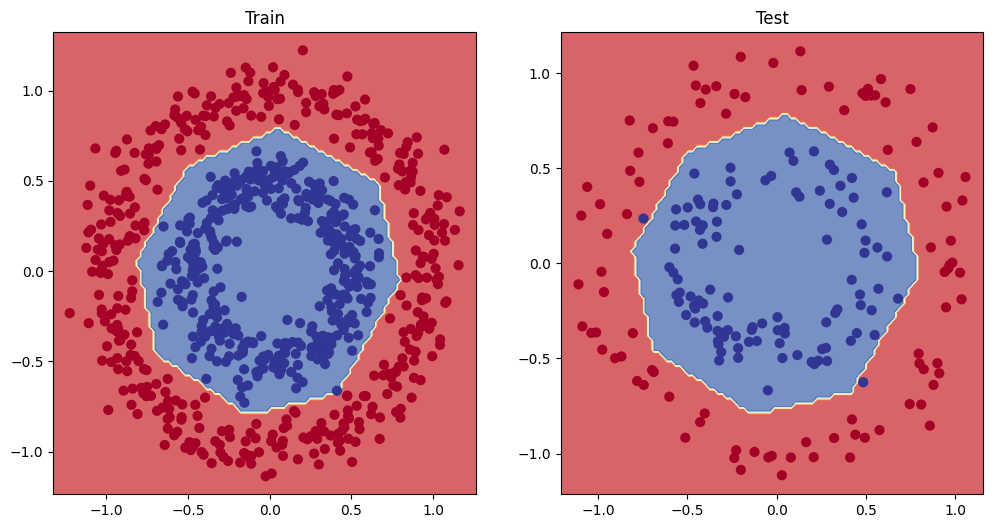

In [ ]:
#plot the decision boundary

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8 , x = x_train , y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8 , x = x_test , y = y_test)
plt.show()

# plot the loss and training

In [ ]:
# convert the distory obj in dataframe

pd.DataFrame(history.history)

,loss,accuracy
0,0.699566,0.44500
1,0.667355,0.52250
2,0.635565,0.58875
3,0.583468,0.67750
4,0.539927,0.72500
...,...,...
95,0.004668,1.00000
96,0.004548,1.00000
97,0.004668,0.99875
98,0.004293,1.00000


Text(0.5, 1.0, 'Model_8 loss curve')

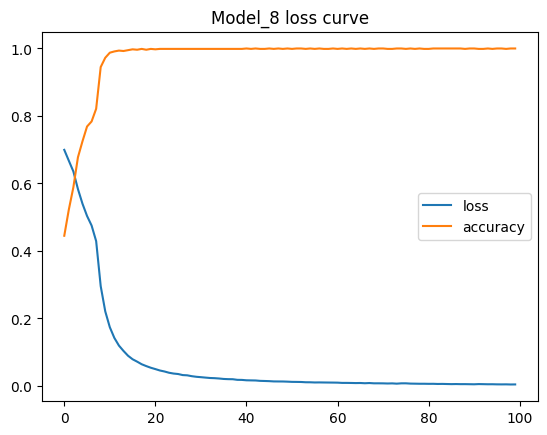

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve")

In [ ]:
# loss curve going down then its good

# Finding the best learning rate (the lr where the loss decrease the most)

* a learning rate **callback** -  a function added to model to find the best lr



In [ ]:
tf.random.set_seed(43)


model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 ,activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
])


model_9.compile(loss = "binary_crossentropy" ,
                optimizer = "Adam",
                metrics = ['accuracy'])

# call back part
# create our lr call back

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-4 * 10 ** (epochs/20))


#fit model with schudeler
history_9 = model_9.fit(x_train , y_train , epochs = 100 , callbacks = [lr_scheduler] )


Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6984 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6972 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6965 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss

<Axes: xlabel='epochs'>

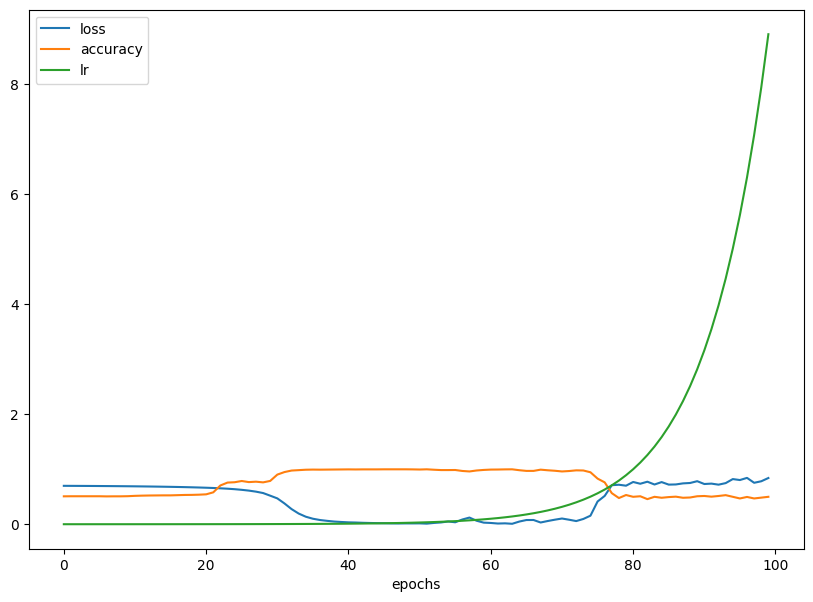

In [ ]:
pd.DataFrame(history_9.history).plot(figsize = (10, 7) , xlabel = "epochs")

Text(0, 0.5, 'loss')

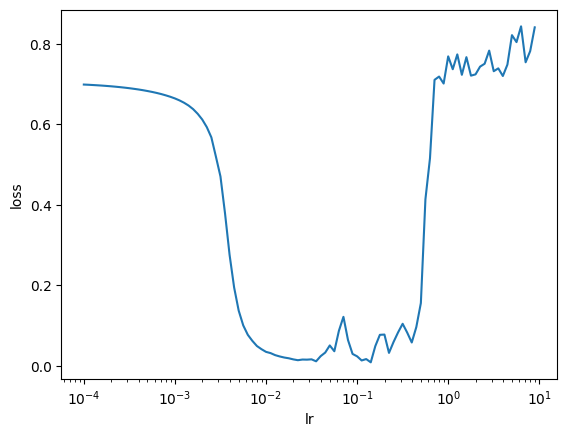

In [ ]:
#plot the loss and lr

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.semilogx(lrs , history_9.history['loss'])
plt.xlabel("lr")
plt.ylabel("loss")


In [ ]:
tf.random.set_seed(43)


model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 ,activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
])


model_9.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(2e-2),
                metrics = ['accuracy'])

# call back part
# create our lr call back

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-4 * 10 ** (epochs/20))


#fit model with schudeler
history_9 = model_9.fit(x_train , y_train , epochs = 100 , verbose = 0)


<Axes: >

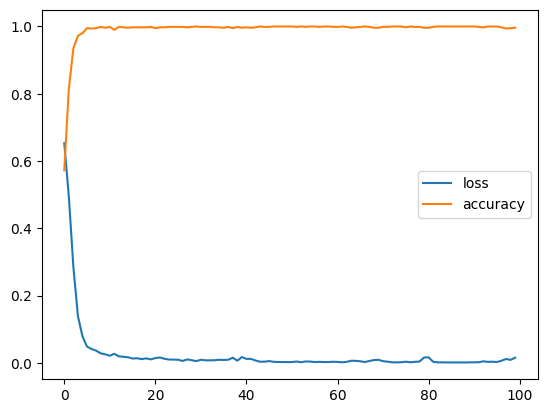

In [ ]:
pd.DataFrame(history_9.history).plot()

313/313 [==============================] - 1s 1ms/step
doing bonary classification 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)


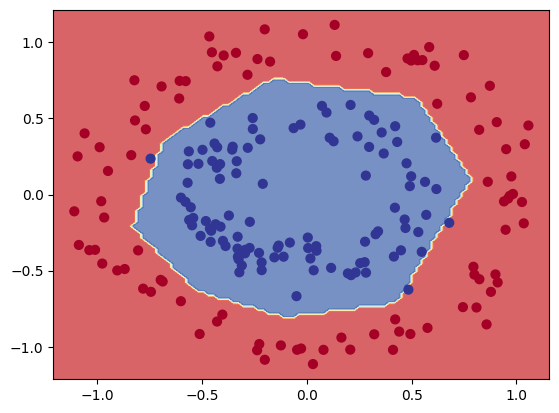

In [ ]:
plot_decision_boundary(model_9 , x = x_test , y = y_test)


In [ ]:
# evaluate on test dataset

model_9.evaluate(x_test  ,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9850


[0.028370806947350502, 0.9850000143051147]

# Classification evaluation methods
   * tp  -- true positive , tn - true negative
   * fp - false positive , fn - false negative


   * acccuracy - tf.keras.metrics.Accuracy()    (not good for imbalance class)
   * precision  -  tf.keras.metrics.Precision()  (higher precision leads to less false positive result)
   * recall -  tf.keras.metrics.Recall()  (higer recall leads to less false negative)

    ** precision recall trade off -- u cant have precison recall both high at the same time
   * F1-score - sklearn.metrics.f1_score()  (combo of precision and recall )

   * confusion matrix = sklearn.metrics.confusion_matrix() (when comapring prediction to truth labels to see where model got confused .  hard to use when large number of classses)

  * Classification rreport    




In [ ]:
# check accuracy of our model

loss , accuracy = model_9.evaluate(x_test , y_test)
print("model loss ",loss , " model accuaracy on test set ",accuracy*100 , "%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9850
model loss  0.028370806947350502  model accuaracy on test set  98.50000143051147 %


In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = model_9.predict(x_test)

# confusion_matrix(y_test , y_pred)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_pred[:10]

array([[1.9713941e-01],
       [9.9999750e-01],
       [3.4350060e-18],
       [3.4012940e-14],
       [9.9998116e-01],
       [6.5340723e-13],
       [9.9999762e-01],
       [5.9298927e-08],
       [9.9998993e-01],
       [6.7374927e-08]], dtype=float32)

In [ ]:
# convert to 0 and 1

tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test , tf.round(y_pred))

array([[ 95,   0],
       [  3, 102]])

In [ ]:
# prettify our confusion matrix

# Confusion matrix

In [ ]:
import itertools
def confusion_mat(y_test , y_pred ):
  figsize = (6,6)

  #create confusion matrix

  cm = confusion_matrix(y_test , tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[ : ,np.newaxis] # normalise
  n_classes = cm.shape[0]


  # lets prettify it

  fig , ax = plt.subplots(figsize = figsize)

  cax = ax.matshow(cm , cmap = plt.cm.Blues)

  fig.colorbar(cax)

  #create classes
  classes = False

  if classes :
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  #label the axes

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True label" ,
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels  = labels ,
        yticklabels  = labels)

  # set axis label below
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust label size

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)
  # set thresh hold for different color

  threshold = (cm.max() + cm.min())  / 2

  # plot the text on each cells

  for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j , i ,f"{cm[i,j]} ({cm_norm[i , j]*100 : .1f}% ) " ,
            horizontalalignment = "center" ,
            color = "white" if cm[i,j] > threshold else "black",
            size = 15)




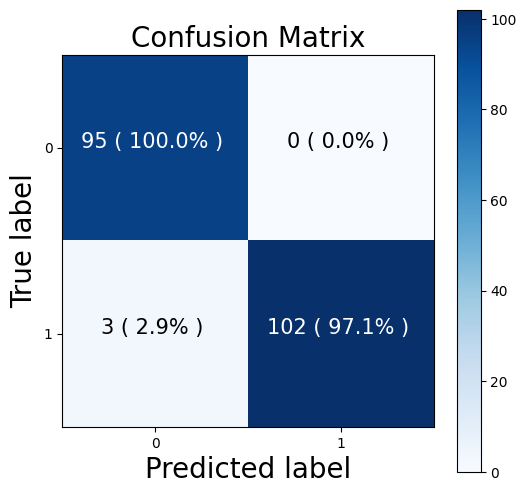

In [ ]:
confusion_mat(y_test , y_pred)

# Working with larger examples (Multi class classification)

In [ ]:
# fashion mnist fashion data set

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
train_data[0].shape

(28, 28)

3


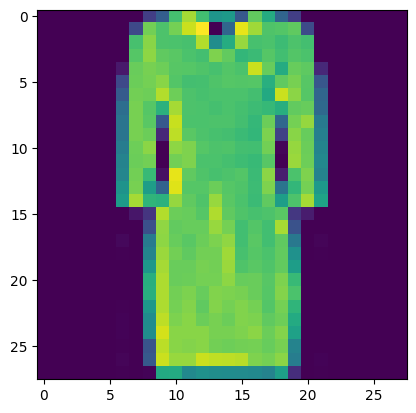

In [ ]:
#plot a single sample

import matplotlib.pyplot as plt


plt.imshow(train_data[9000])

print(train_labels[9000])

In [ ]:
class_name = ["Tshirt/top" ,"Trouser" , "Pullover" , "Dress" , "Coat" , "Sandle" , "Shirt" , "Sneaker" , "Bag"  , "Ankle boot" ]
len(class_name)

10

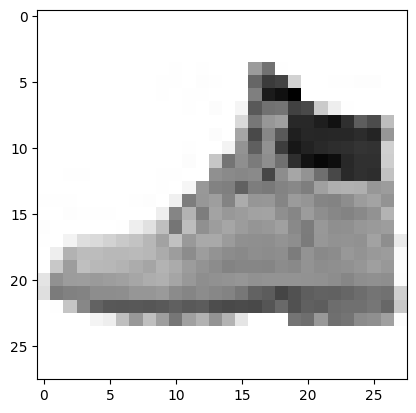

In [ ]:
plt.imshow(train_data[90] , cmap = plt.cm.binary)


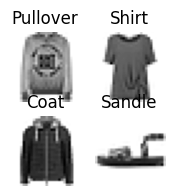

In [ ]:
#plot multiple random images
import random

plt.figure(figsize = (2,2))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index] , cmap = plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
## building multi class model

train_data[0].shape , train_labels.shape

((28, 28), (60000,))

In [ ]:
tf.random.set_seed(43)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])



model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"] )


non_norm_hist = model_11.fit(train_data , tf.one_hot(train_labels , depth = 10) , epochs = 10 ,
                             validation_data = (test_data , tf.one_hot(test_labels , depth = 10)))


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3041 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy:

In [ ]:
#check the model summmary

model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#neural network prefer normalised data
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
tf.random.set_seed(43)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])



model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"] )


non_norm_hist = model_12.fit(train_data_norm , tf.one_hot(train_labels , depth = 10) , epochs = 5 ,
                             validation_data = (test_data_norm , tf.one_hot(test_labels , depth = 10)))


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2284 - accuracy: 0.5579 - val_loss: 0.8425 - val_accuracy: 0.7295
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7425 - accuracy: 0.7558 - val_loss: 0.7027 - val_accuracy: 0.7607
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6522 - accuracy: 0.7808 - val_loss: 0.6371 - val_accuracy: 0.7856
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5932 - accuracy: 0.8008 - val_loss: 0.5953 - val_accuracy: 0.8031
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5635 - accuracy: 0.8086 - val_loss: 0.5905 - val_accuracy: 0.7960


<Axes: >

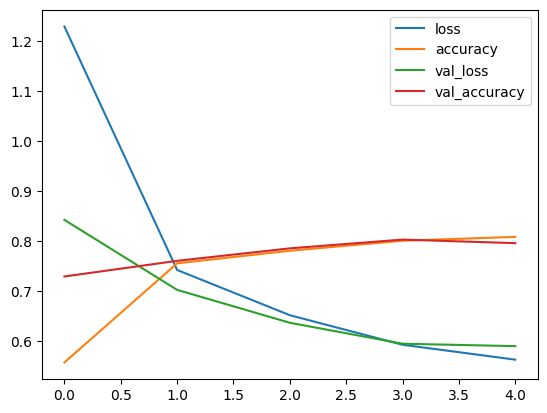

In [ ]:
pd.DataFrame(non_norm_hist.history).plot()

In [ ]:
tf.random.set_seed(43)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape = (28,28)),
    tf.keras.layers.Dense(4 , activation = "relu" ),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])


model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#lr call back

le_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch / 20))
hist_13 = model_13.fit(train_data_norm , train_labels , epochs = 10 ,
                       validation_data = (test_data_norm , test_labels)
                       ,callbacks = [le_scheduler]
                       )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0537 - accuracy: 0.5977 - val_loss: 0.7382 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6556 - accuracy: 0.7756 - val_loss: 0.6234 - val_accuracy: 0.7865 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5918 - accuracy: 0.8004 - val_loss: 0.5907 - val_accuracy: 0.8016 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.8092 - val_loss: 0.5804 - val_accuracy: 0.8038 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5522 - accuracy: 0.8134 - val_loss: 0.5589 - val_accuracy: 0.8101 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5397 - accuracy: 0.8158 - val_loss: 0.5543 - val_accuracy: 0.8125 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'finding ideal learning rate')

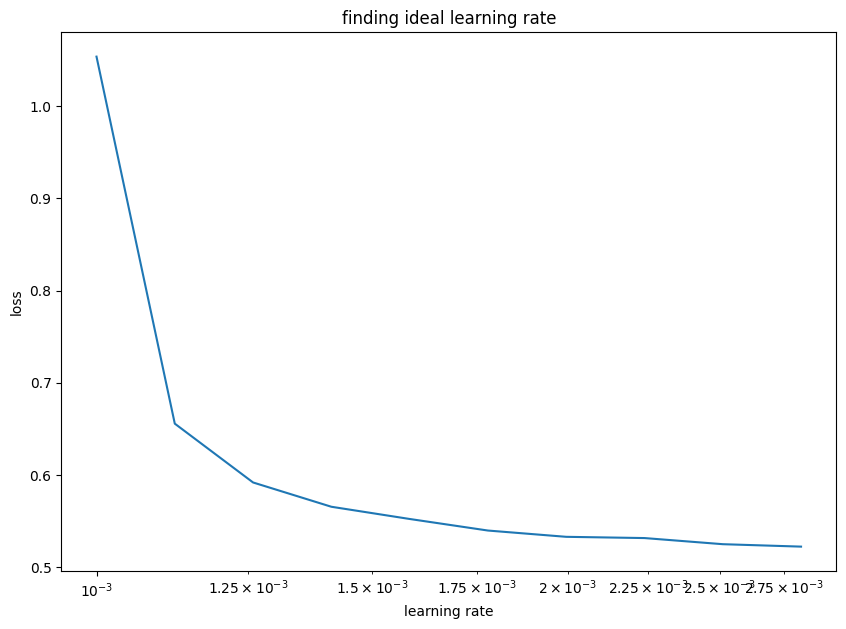

In [ ]:
#plot lr decay ccurve

lrs = 1e-3 *( 10 **(tf.range(10)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs , hist_13.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding ideal learning rate")

In [ ]:
tf.random.set_seed(43)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape = (28,28)),
    tf.keras.layers.Dense(4 , activation = "relu" ),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])


model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 metrics = ["accuracy"])

#lr call back

#le_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch / 20))
hist_13 = model_13.fit(train_data_norm , train_labels , epochs = 10 ,
                       validation_data = (test_data_norm , test_labels)

                       )

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2426 - accuracy: 0.5659 - val_loss: 0.9228 - val_accuracy: 0.6723
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8452 - accuracy: 0.6949 - val_loss: 0.8212 - val_accuracy: 0.7008
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7692 - accuracy: 0.7204 - val_loss: 0.7649 - val_accuracy: 0.7205
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7160 - accuracy: 0.7442 - val_loss: 0.7271 - val_accuracy: 0.7429
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6814 - accuracy: 0.7569 - val_loss: 0.7037 - val_accuracy: 0.7485
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6599 - accuracy: 0.7636 - val_loss: 0.6894 - val_accuracy: 0.7518
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6459 - accuracy: 0.7684 - val_loss: 0.6830 - val_accuracy:

In [ ]:
import itertools
def confusion_mat(y_test , y_pred ):
  figsize = (15,15)

  #create confusion matrix

  cm = confusion_matrix(y_test , tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[ : ,np.newaxis] # normalise
  n_classes = cm.shape[0]


  # lets prettify it

  fig , ax = plt.subplots(figsize = figsize)

  cax = ax.matshow(cm , cmap = plt.cm.Blues)

  fig.colorbar(cax)

  #create classes
  classes = False

  if classes :
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  #label the axes

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True label" ,
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels  = labels ,
        yticklabels  = labels)

  # set axis label below
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust label size

  ax.yaxis.label.set_size(10)
  ax.xaxis.label.set_size(10)
  ax.title.set_size(10)
  # set thresh hold for different color

  threshold = (cm.max() + cm.min())  / 2

  # plot the text on each cells

  for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j , i ,f"{cm[i,j]} ({cm_norm[i , j]*100 : .1f}% ) " ,
            horizontalalignment = "center" ,
            color = "white" if cm[i,j] > threshold else "black",
            size = 8)




In [ ]:
class_name

['Tshirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandle',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs = model_13.predict(test_data_norm)

class_name[tf.argmax(y_probs[0])]

313/313 [==============================] - 1s 3ms/step


'Ankle boot'

In [ ]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels , y_pred = y_preds )

array([[711,   3,  29, 167,  32,   2,  39,   0,  17,   0],
       [  1, 942,   2,  40,   6,   0,   3,   0,   5,   1],
       [ 24,   1, 620,  26, 264,   0,  45,   0,  20,   0],
       [ 31,  23,   5, 864,  37,   0,  25,   0,  15,   0],
       [  4,   0, 126,  56, 712,   0,  30,   0,  72,   0],
       [  0,   0,   0,   0,   0, 897,   0,  78,   8,  17],
       [167,   6, 172, 108, 429,   0,  66,   0,  52,   0],
       [  0,   0,   0,   0,   0,  33,   0, 933,   0,  34],
       [  0,   1,   3,  12,  25,   9,   4,   3, 941,   2],
       [  0,   0,   0,   0,   0,   7,   0,  56,   7, 930]])

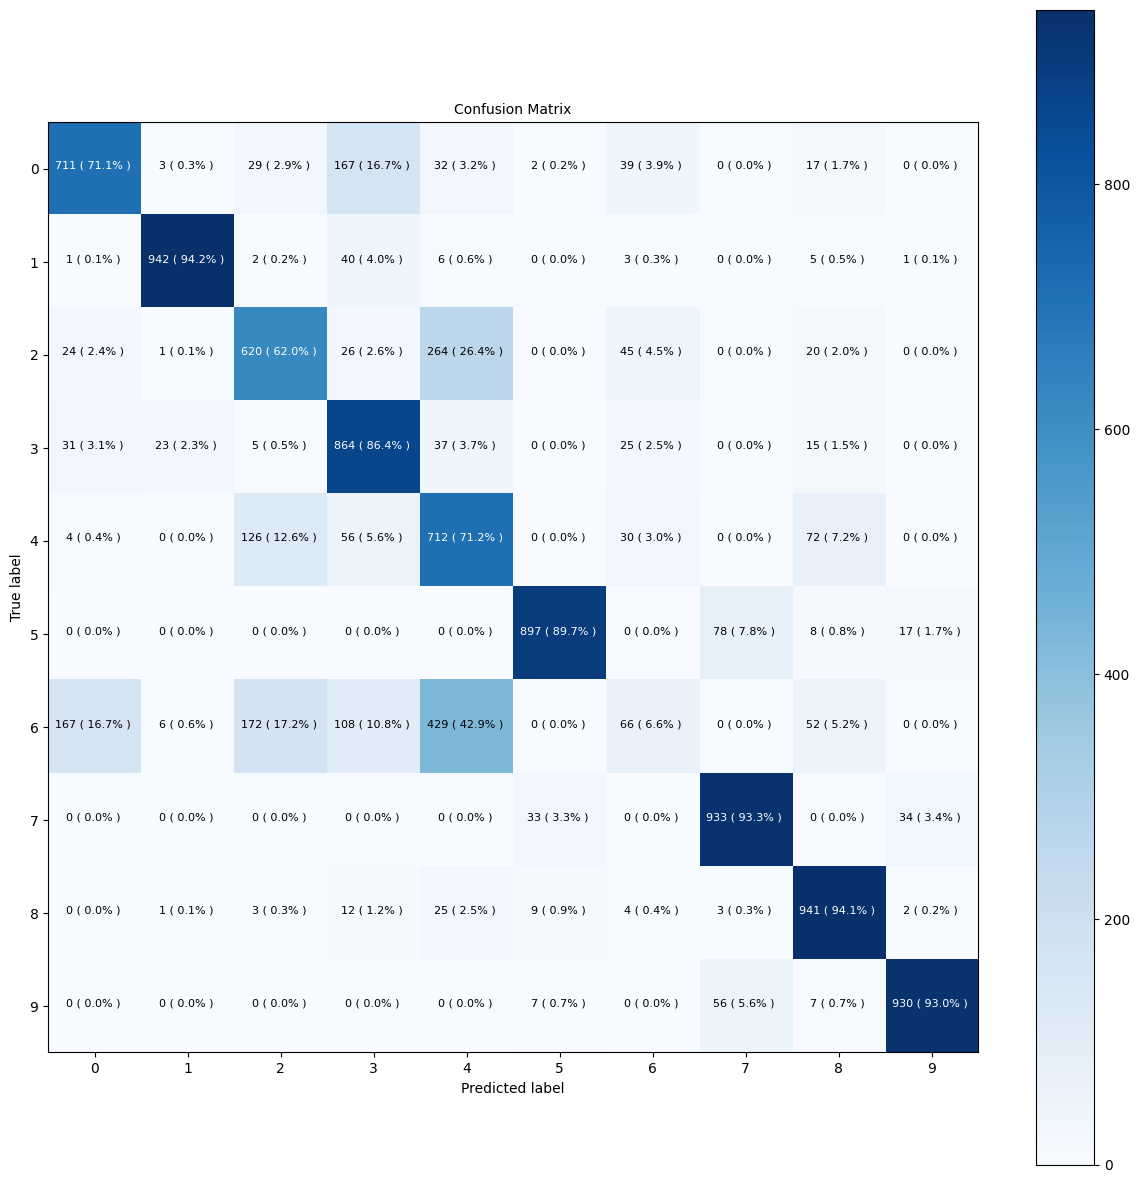

In [ ]:
confusion_mat(test_labels , y_preds )

In [ ]:
import random

def plot_random_image(model , images , true_labels , classes):
  """picks randoom image and plot with true label"""

  i = random.randint(0 , len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_labels = classes[pred_probs.argmax()]
  true_label  =classes[true_labels[i]]


  plt.imshow(target_image , cmap = plt.cm.binary)

  if pred_labels == true_label:
    color = "green"

  else:
    color = "red"


  plt.xlabel("preds : {}{:2.0f}% (True: {})".format(pred_labels , 100*tf.reduce_max(pred_probs), true_label) , color = color)


1/1 [==============================] - 0s 23ms/step


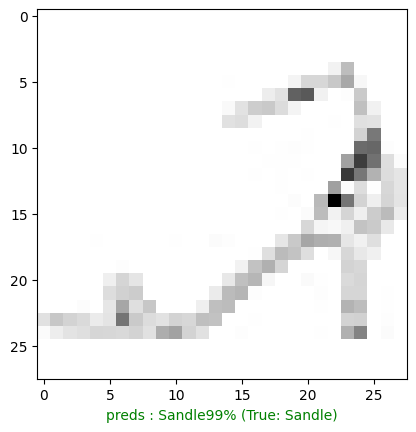

In [ ]:
plot_random_image(model = model_13 , images = test_data_norm , true_labels = test_labels , classes = class_name)

# What pattern is our model learning

In [ ]:
model_13.layers

In [ ]:
model_13.layers[1]

In [ ]:
#get the pattern of a layer in our network
weights , biases = model_13.layers[1].get_weights()

weights , weights.shape

(array([[ 0.06098194, -0.07837553,  0.24759004,  0.08017479],
        [ 0.14666946,  0.14619097,  0.20092525,  0.01758543],
        [ 0.32496658,  0.02558674, -0.02014876, -0.04147163],
        ...,
        [ 0.46847892,  0.01123371, -0.63421017,  0.09473563],
        [ 0.12197593,  0.20540954, -0.27914554,  0.03309278],
        [ 0.3101218 ,  0.23001078,  0.21588956, -0.20117328]],
       dtype=float32),
 (784, 4))

In [ ]:
biases , biases.shape

(array([ 2.598249 , -0.6798979,  1.9977776,  2.1979685], dtype=float32), (4,))